# Road Transport Network

## 0 Setup environment

In [1]:
import os

import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox

In [2]:
BASE_PATH = "./data"
BOUNDARIES_FILE = os.path.join(BASE_PATH, "boundaries.gpkg")

## 1 Load town boundaries

In [3]:
gdf_boundaries = gpd.read_file(BOUNDARIES_FILE)
gdf_boundaries.head()

,town,province,geometry
0,Bacacay,Albay,"MULTIPOLYGON (((123.84193 13.3341, 123.84204 1..."
1,Camalig,Albay,"MULTIPOLYGON (((123.6559 13.06131, 123.65536 1..."
2,Daraga,Albay,"MULTIPOLYGON (((123.71487 13.03995, 123.71474 ..."
3,Guinobatan,Albay,"MULTIPOLYGON (((123.68355 13.25321, 123.67729 ..."
4,Jovellar,Albay,"MULTIPOLYGON (((123.6559 13.06131, 123.65568 1..."


## 2 Generate road network graph

In [4]:
graph_roads = ox.graph_from_place(
    "Bicol Region",
    network_type="drive_service",
    simplify=False,
    retain_all=True,
)

/home/ainz/Code/transport-network-analysis/.venv/lib64/python3.13/site-packages/osmnx/_overpass.py:267: UserWarning: This area is 25 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


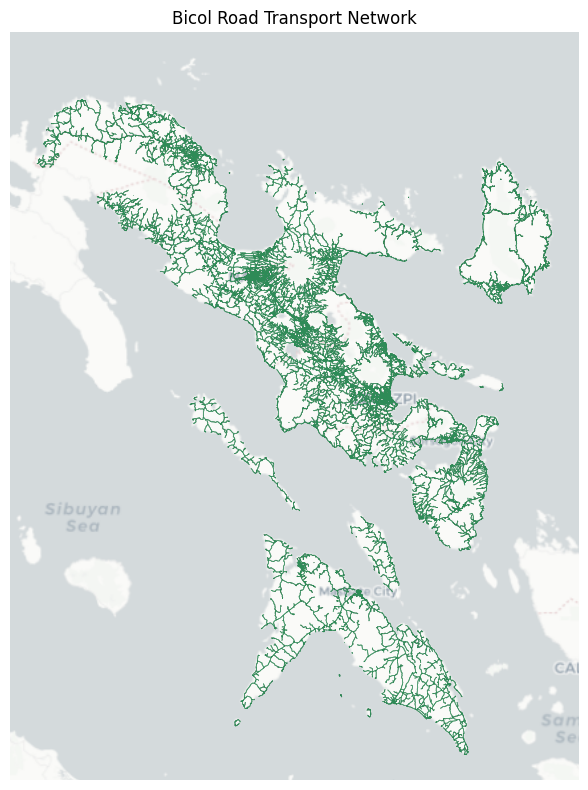

In [5]:
_, ax = plt.subplots(figsize=(8, 8))

ox.plot_graph(graph_roads, ax=ax, node_size=0, edge_color="seagreen", edge_linewidth=0.5, show=False, close=False)

x_min, y_min, x_max, y_max = gdf_boundaries.total_bounds
padding = 0.1
ax.set_xlim(x_min - padding, x_max + padding)
ax.set_ylim(y_min - padding, y_max + padding)

cx.add_basemap(ax, crs=gdf_boundaries.crs, source=cx.providers.CartoDB.Positron, attribution="")

plt.title("Bicol Road Transport Network")
plt.tight_layout()
plt.axis("off")

filepath = os.path.join(BASE_PATH, "road_network.png")
plt.savefig(filepath, dpi=300, bbox_inches="tight")

plt.show()

In [6]:
edges = ox.graph_to_gdfs(graph_roads, nodes=False, edges=True)
edges.head()

osmid    highway lanes  oneway  reversed  \
u         v          key                                                 
300744333 2934697741 0    289934620   tertiary     2   False     False   
          2934697740 0    289934620   tertiary     2   False      True   
300744350 300749369  0    289934603  secondary   NaN   False     False   
          300750759  0    289934603  secondary   NaN   False      True   
300744370 2949191081 0    245920268   tertiary   NaN   False      True   

                              length name  ref bridge service maxspeed access  \
u         v          key                                                        
300744333 2934697741 0     83.055103  NaN  NaN    NaN     NaN      NaN    NaN   
          2934697740 0     90.958783  NaN  NaN    NaN     NaN      NaN    NaN   
300744350 300749369  0     82.891476  NaN  NaN    NaN     NaN      NaN    NaN   
          300750759  0    445.169508  NaN  NaN    NaN     NaN      NaN    NaN   
300744370 2949191081 0     29.300534  NaN  NaN    NaN     NaN      NaN    NaN   

                         width junction tunnel  \
u         v          key                         
300744333 2934697741 0     NaN      NaN    NaN   
          2934697740 0     NaN      NaN    NaN   
300744350 300749369  0     NaN      NaN    NaN   
          300750759  0     NaN      NaN    NaN   
300744370 2949191081 0     NaN      NaN    NaN   

                                                                   geometry  
u         v          key                                                     
300744333 2934697741 0    LINESTRING (124.01473 11.78426, 124.01474 11.7...  
          2934697740 0    LINESTRING (124.01473 11.78426, 124.01473 11.7...  
300744350 300749369  0    LINESTRING (124.00135 11.94932, 124.00096 11.9...  
          300750759  0    LINESTRING (124.00135 11.94932, 124.00371 11.9...  
300744370 2949191081 0    LINESTRING (124.03376 11.76261, 124.03391 11.7...

In [7]:
nodes = ox.graph_to_gdfs(graph_roads, nodes=True, edges=False)
nodes.head()

,y,x,street_count,highway,railway,junction,ref,geometry
osmid,,,,,,,,
300744333,11.784265,124.014730,2,NaN,NaN,NaN,NaN,POINT (124.01473 11.78426)
300744350,11.949325,124.001347,2,NaN,NaN,NaN,NaN,POINT (124.00135 11.94932)
300744370,11.762615,124.033762,3,NaN,NaN,NaN,NaN,POINT (124.03376 11.76261)
300744443,11.790640,124.041177,2,NaN,NaN,NaN,NaN,POINT (124.04118 11.79064)
300744498,11.881613,124.004662,2,NaN,NaN,NaN,NaN,POINT (124.00466 11.88161)


## 3 Save graph into file

In [8]:
filepath = os.path.join(BASE_PATH, "road_network.graphml")
ox.save_graphml(graph_roads, filepath=filepath)